In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 298MB/s]
100% 1.06G/1.06G [00:04<00:00, 238MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [15]:
#generator
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",  # it will assign cat=0 and dog=1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256))

validation_data =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256))



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
#normalize

def process(image,label): # This function will transform pixel value between [0-1].
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

In [21]:
#CNN MODEL

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2),padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [24]:
history = model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 87ms/step - accuracy: 0.5553 - loss: 2.7442 - val_accuracy: 0.6356 - val_loss: 0.6285
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6415 - loss: 0.6386 - val_accuracy: 0.6608 - val_loss: 0.6216
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7038 - loss: 0.5769 - val_accuracy: 0.6312 - val_loss: 0.6986
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7589 - loss: 0.5027 - val_accuracy: 0.7060 - val_loss: 0.5923
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7947 - loss: 0.4537 - val_accuracy: 0.7882 - val_loss: 0.4541
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8122 - loss: 0.4105 - val_accuracy: 0.6652 - val_loss: 1.0182
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8532 - loss: 0.3404 - val_accuracy: 0.7824 - val_loss: 0.4969
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8937 - loss: 0.2563 - 

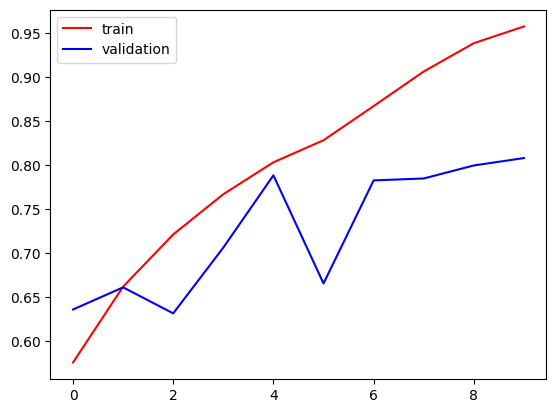

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

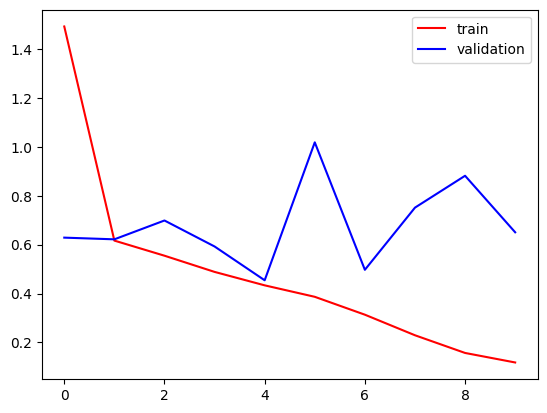

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [46]:
#for cat
import cv2
dog_test_img = cv2.imread( '/content/dog.jpeg')


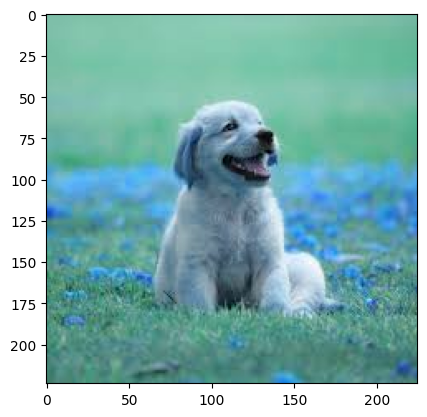

In [47]:
plt.imshow(dog_test_img)

In [48]:
dog_test_img.shape

(224, 225, 3)

array([[[124, 189, 167],
        [124, 189, 167],
        [124, 189, 167],
        ...,
        [117, 184, 163],
        [117, 184, 163],
        [117, 184, 163]],

       [[124, 189, 167],
        [124, 189, 167],
        [124, 189, 167],
        ...,
        [117, 184, 163],
        [117, 184, 163],
        [117, 184, 163]],

       [[125, 190, 168],
        [125, 190, 168],
        [125, 190, 168],
        ...,
        [116, 183, 162],
        [116, 183, 162],
        [116, 183, 162]],

       ...,

       [[ 68, 126, 106],
        [ 66, 126, 106],
        [ 66, 124, 106],
        ...,
        [ 69, 123, 121],
        [ 65, 117, 119],
        [ 62, 113, 120]],

       [[ 68, 124, 105],
        [ 67, 125, 105],
        [ 68, 123, 106],
        ...,
        [ 74, 130, 117],
        [ 71, 126, 116],
        [ 70, 123, 119]],

       [[ 68, 124, 105],
        [ 68, 124, 105],
        [ 68, 123, 106],
        ...,
        [ 77, 136, 116],
        [ 75, 132, 116],
        [ 74, 129, 120]]], dtype=uint8)
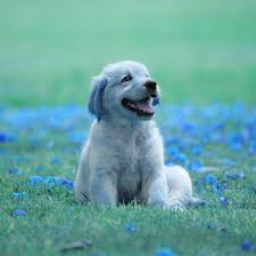

In [49]:
test_img = cv2.resize(dog_test_img,(256,256))
test_img


In [50]:
test_input = test_img.reshape((1,256,256,3))

In [51]:
model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.]], dtype=float32)